In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset/irisdata.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


## Removing the unwanted columns

In [5]:
data.drop(columns='Unnamed: 0', inplace=True)

In [6]:
data.groupby('Species').agg(['min','max','std','mean'])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

## Filling process of nan-values

In [8]:
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(),inplace=True)

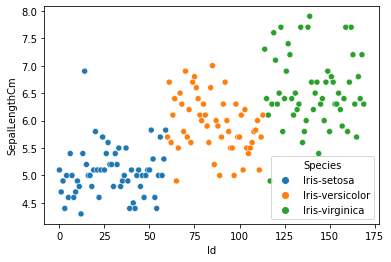

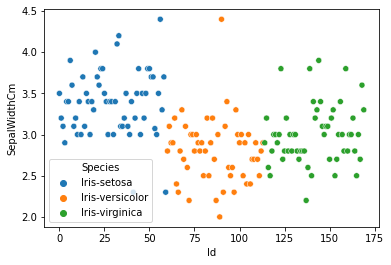

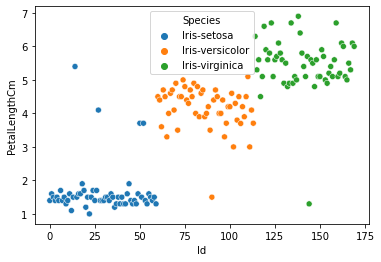

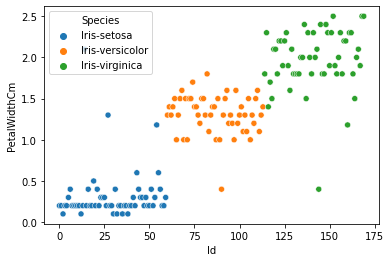

In [9]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x='Id',y=column, hue='Species')
    plt.show()

## Outlier detection

3 sigma and quantiles

In [10]:
for column in data.columns[1:-1]:
    for spec in data['Species'].unique():
        sspec = data[data['Species']==spec]
        scol = sspec[column]
        std= scol.std()
        avg= scol.mean()
        tsp= avg+(3*std)
        tsm= avg-(3*std)
        outliers = scol[((sspec[column]>tsp)|(sspec[column]<tsm))].index
        data.drop(index=outliers,inplace=True)
        print(column,spec,outliers)
        

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


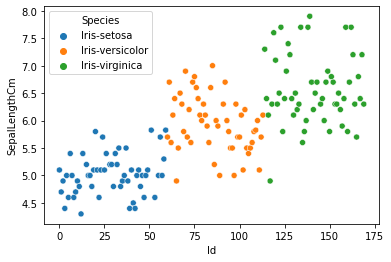

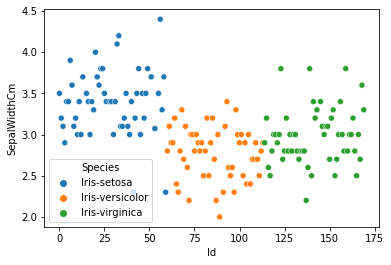

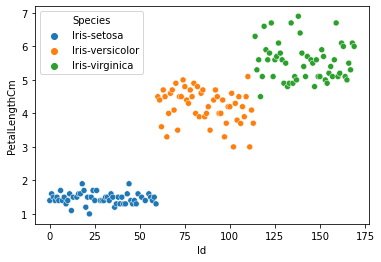

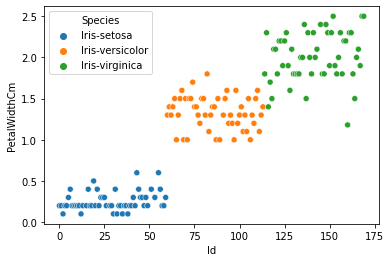

In [11]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x='Id',y=column, hue='Species')
    plt.show()

In [12]:
for column in data.columns[1:-1]:
    for spec in data['Species'].unique():
        sspec = data[data['Species']==spec]
        scol = sspec[column]
        
        q1 = scol.quantile(0.25)
        q2 = scol.quantile(0.75)
        iqr= q2-q1
        
        minm= q1 - (1.5*iqr)
        maxm= q2 + (1.5*iqr)
        
        maxidx = data[(data['Species']==spec) & (data[column]>maxm)].index
        minidx = data[(data['Species']==spec) & (data[column]<minm)].index
        
        print(column,spec,"-- min=",minm,"-- max=",maxm)
        print(maxidx)
        print(minidx)
        
        data.drop(index=maxidx, inplace=True)
        data.drop(index=minidx, inplace=True)
        

        

SepalLengthCm Iris-setosa -- min= 4.199999999999999 -- max= 5.800000000000001
Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor -- min= 4.549999999999999 -- max= 7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica -- min= 5.15 -- max= 7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa -- min= 2.35 -- max= 4.35
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
SepalWidthCm Iris-versicolor -- min= 1.75 -- max= 3.75
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica -- min= 2.1999999999999993 -- max= 3.8000000000000007
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa -- min= 1.0999999999999996 -- max= 1.9000000000000004
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor -- min= 2.8500000000000005 -- max= 5.649999999999999

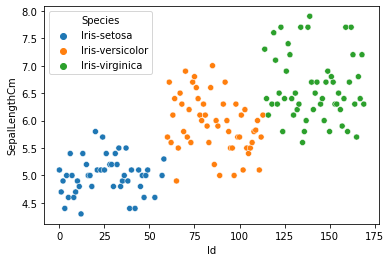

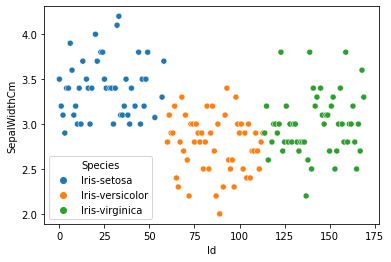

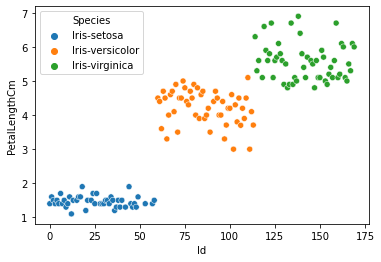

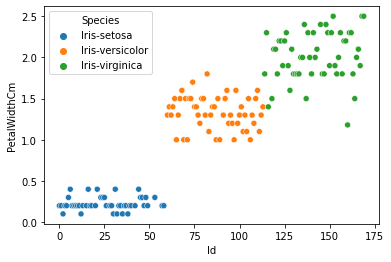

In [13]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data,x='Id',y=column, hue='Species')
    plt.show()

In [14]:
data.to_csv("Dataset/processeddata.csv")

## Data Visualization
Other options

<AxesSubplot:xlabel='Species', ylabel='count'>

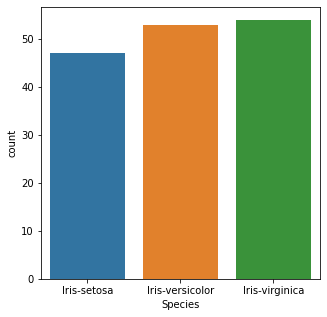

In [15]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(x='Species',data=data,ax=ax)

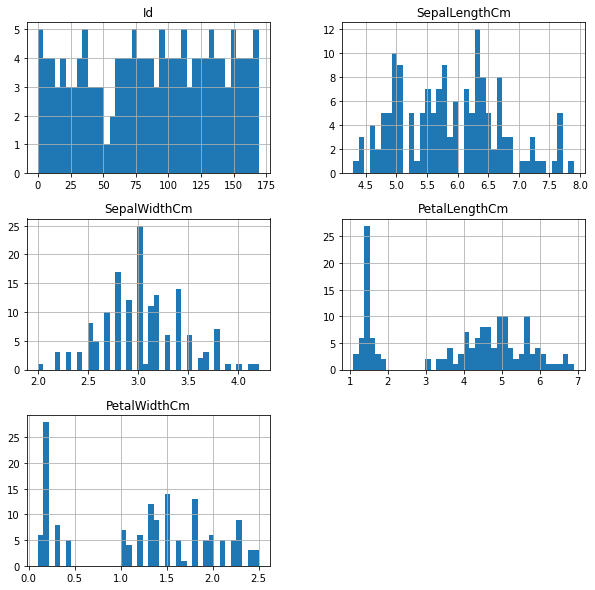

In [16]:
hist= data.hist(bins=40,figsize=(10,10))


## Correlation Matrix
I want to understand the corelations of variables

<AxesSubplot:>

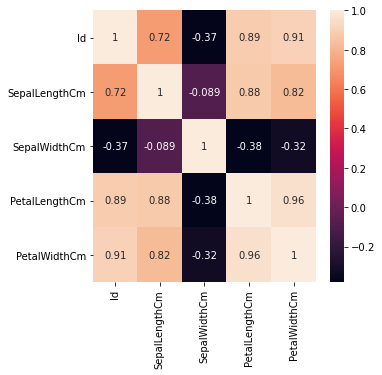

In [17]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)
